## Module 12 - Autoencoders

# Assignment


1. change the `encoding_dim` through various values (`range(2,18,2)` and store or keep track of the best loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot


In [24]:
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import pandas as pd
import numpy as np

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape

((60000, 784), (10000, 784))

In [25]:
import tensorflow as tf
from tensorflow import keras

In [30]:
loss = {}

for i in range(2, 18, 2):
    
    encoding_dim = i 
    
    x = input_img = Input(shape=(784,))
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)
    
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)    
    
    autoencoder = Model(input_img, decoded)    
    
    encoder = Model(input_img, encoded)    
    
    encoded_input = Input(shape=(encoding_dim,))    
    
    dcd1 = autoencoder.layers[-1]
    dcd2 = autoencoder.layers[-2]
    dcd3 = autoencoder.layers[-3]    
    
    decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))
    
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
        
    autoencoder.fit(xtrain, xtrain,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])
    
    loss[i] = autoencoder.evaluate(xtrain, xtrain, verbose = 0)    

Epoch 1/50
235/235 [==============================] - 3s 8ms/step - loss: 0.2778 - val_loss: 0.2503
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2336 - val_loss: 0.2156
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2104 - val_loss: 0.2052
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2018 - val_loss: 0.1988
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1961 - val_loss: 0.1942
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1924 - val_loss: 0.1911
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1899 - val_loss: 0.1895
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1882 - val_loss: 0.1878
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1867 - val_loss: 0.1871
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1855 - val_loss: 0.1856

235/235 [==============================] - 2s 7ms/step - loss: 0.1386 - val_loss: 0.1430
Epoch 49/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1384 - val_loss: 0.1434
Epoch 50/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1383 - val_loss: 0.1428
Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2468 - val_loss: 0.1862
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1685 - val_loss: 0.1547
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1507 - val_loss: 0.1460
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1449 - val_loss: 0.1423
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1417 - val_loss: 0.1401
Epoch 6/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1394 - val_loss: 0.1384
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1376 - val_loss: 0.1363
Epoch 8/5

235/235 [==============================] - 2s 7ms/step - loss: 0.1155 - val_loss: 0.1180
Epoch 42/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1154 - val_loss: 0.1178
Epoch 43/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1152 - val_loss: 0.1175
Epoch 44/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1151 - val_loss: 0.1175
Epoch 45/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1149 - val_loss: 0.1175
Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.2332 - val_loss: 0.1594
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1484 - val_loss: 0.1394
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1367 - val_loss: 0.1322
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1312 - val_loss: 0.1278
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1273 - val_loss: 0.1243
Epoch 6

235/235 [==============================] - 2s 8ms/step - loss: 0.1097 - val_loss: 0.1113
Epoch 42/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1095 - val_loss: 0.1110
Epoch 43/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1094 - val_loss: 0.1110
Epoch 44/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1092 - val_loss: 0.1108
Epoch 45/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1091 - val_loss: 0.1110
Epoch 46/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1090 - val_loss: 0.1110
Epoch 1/50
235/235 [==============================] - 2s 7ms/step - loss: 0.2389 - val_loss: 0.1659
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1533 - val_loss: 0.1441
Epoch 3/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1411 - val_loss: 0.1371
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1358 - val_loss: 0.1328
Epoch 

235/235 [==============================] - 2s 8ms/step - loss: 0.0979 - val_loss: 0.0977
Epoch 27/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0976 - val_loss: 0.0978
Epoch 28/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0974 - val_loss: 0.0976
Epoch 29/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0971 - val_loss: 0.0973
Epoch 30/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0969 - val_loss: 0.0970
Epoch 31/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0966 - val_loss: 0.0969
Epoch 32/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0965 - val_loss: 0.0969
Epoch 33/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0963 - val_loss: 0.0971
Epoch 34/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0960 - val_loss: 0.0965
Epoch 35/50
235/235 [==============================] - 2s 7ms/step - loss: 0.0958 - val_loss: 0.0964
E

In [31]:
loss

{2: 0.17197497189044952,
 4: 0.13771149516105652,
 6: 0.12169531732797623,
 8: 0.1146538108587265,
 10: 0.1068718358874321,
 12: 0.1089300885796547,
 14: 0.09724261611700058,
 16: 0.09369336813688278}

In [32]:
import matplotlib.pyplot as  plt
%matplotlib inline

Text(0, 0.5, 'Loss')

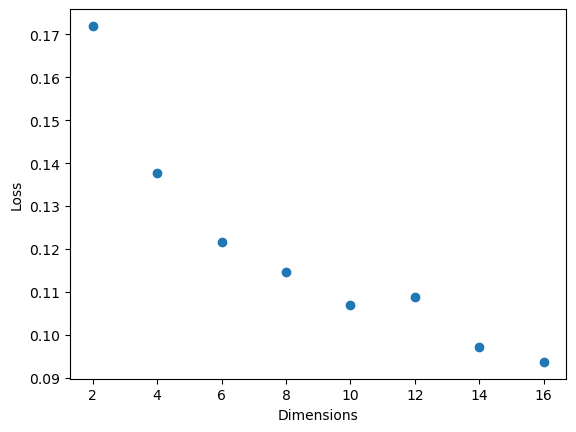

In [33]:
plt.scatter(loss.keys(), loss.values())
plt.xlabel("Dimensions")
plt.ylabel('Loss')



2. **_After_** training an autoencoder with `encoding_dim=8`, apply noise (like the previous assignment) to *_only_* the input of the trained autoencoder (not the output). The output images should be without noise. 

Print a few noisy images along with the output images to show they don't have noise.

In [34]:
loss = {}

for i in range(8):
    
    encoding_dim = i 
    
    x = input_img = Input(shape=(784,))
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)
    
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)    
    
    autoencoder = Model(input_img, decoded)    
    
    encoder = Model(input_img, encoded)    
    
    encoded_input = Input(shape=(encoding_dim,))    
    
    dcd1 = autoencoder.layers[-1]
    dcd2 = autoencoder.layers[-2]
    dcd3 = autoencoder.layers[-3]    
    
    decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))
    
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
        
    autoencoder.fit(xtrain, xtrain,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])
    
    loss[i] = autoencoder.evaluate(xtrain, xtrain, verbose = 0)    

Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.6530 - val_loss: 0.6155
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.5832 - val_loss: 0.5535
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.5275 - val_loss: 0.5038
Epoch 4/50
235/235 [==============================] - 2s 6ms/step - loss: 0.4827 - val_loss: 0.4638
Epoch 5/50
235/235 [==============================] - 2s 6ms/step - loss: 0.4466 - val_loss: 0.4314
Epoch 6/50
235/235 [==============================] - 2s 6ms/step - loss: 0.4174 - val_loss: 0.4050
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.3935 - val_loss: 0.3834
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.3739 - val_loss: 0.3656
Epoch 9/50
235/235 [==============================] - 2s 7ms/step - loss: 0.3577 - val_loss: 0.3508
Epoch 10/50
235/235 [==============================] - 2s 7ms/step - loss: 0.3442 - val_loss: 0.3385

235/235 [==============================] - 2s 8ms/step - loss: 0.1729 - val_loss: 0.1723
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1707 - val_loss: 0.1704
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1689 - val_loss: 0.1691
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1676 - val_loss: 0.1677
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1663 - val_loss: 0.1669
Epoch 11/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1652 - val_loss: 0.1655
Epoch 12/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1642 - val_loss: 0.1649
Epoch 13/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1632 - val_loss: 0.1644
Epoch 14/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1624 - val_loss: 0.1632
Epoch 15/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1617 - val_loss: 0.1632
Epoch

235/235 [==============================] - 2s 7ms/step - loss: 0.1422 - val_loss: 0.1473
Epoch 50/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1420 - val_loss: 0.1476
Epoch 1/50
235/235 [==============================] - 4s 7ms/step - loss: 0.2490 - val_loss: 0.1924
Epoch 2/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1819 - val_loss: 0.1728
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1700 - val_loss: 0.1663
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1643 - val_loss: 0.1594
Epoch 5/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1553 - val_loss: 0.1518
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1506 - val_loss: 0.1492
Epoch 7/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1480 - val_loss: 0.1470
Epoch 8/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1463 - val_loss: 0.1457
Epoch 9/50

235/235 [==============================] - 2s 8ms/step - loss: 0.1220 - val_loss: 0.1224
Epoch 20/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1216 - val_loss: 0.1220
Epoch 21/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1211 - val_loss: 0.1216
Epoch 22/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1207 - val_loss: 0.1212
Epoch 23/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1203 - val_loss: 0.1211
Epoch 24/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1200 - val_loss: 0.1206
Epoch 25/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1196 - val_loss: 0.1205
Epoch 26/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1193 - val_loss: 0.1200
Epoch 27/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1190 - val_loss: 0.1202
Epoch 28/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1188 - val_loss: 0.1201


### No Noise

313/313 [==============================] - 0s 894us/step


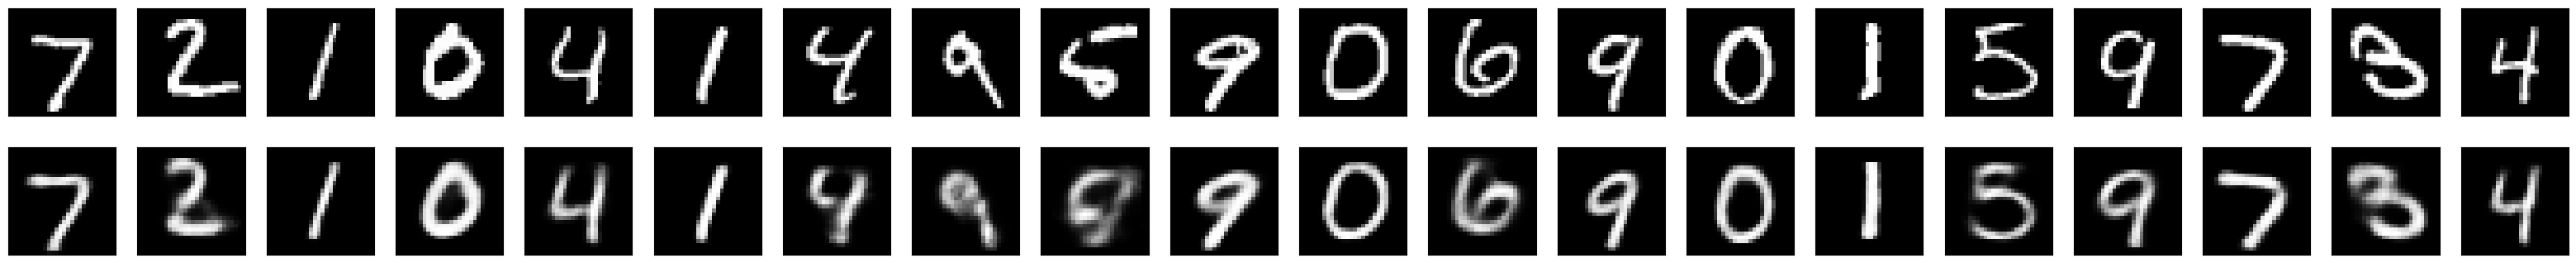

In [35]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [36]:
loss

{0: 0.26338109374046326,
 1: 0.2629716992378235,
 2: 0.17571580410003662,
 3: 0.15329106152057648,
 4: 0.14185652136802673,
 5: 0.13647115230560303,
 6: 0.12825734913349152,
 7: 0.11857785284519196}

In [38]:
x_train_noise10 = xtrain + np.random.normal(0, 255*.10, xtrain.shape)
x_test_noise10 = xtest + np.random.normal(0, 255*.10, xtest.shape)

x_train_noise50 = xtrain + np.random.normal(0, 255*.50, xtrain.shape)
x_test_noise50 = xtest + np.random.normal(0, 255*.50, xtest.shape)

x_train_noise1 = xtrain + np.random.normal(0, 255*1, xtrain.shape)
x_test_noise1 = xtest + np.random.normal(0, 255*1, xtest.shape)

x_train_noise2 = xtrain + np.random.normal(0, 255*2, xtrain.shape)
x_test_noise2 = xtest + np.random.normal(0, 255*2, xtest.shape)

x_train_noise4 = xtrain + np.random.normal(0, 255*4, xtrain.shape)
x_test_noise4 = xtest + np.random.normal(0, 255*4, xtest.shape)

### With Noise

313/313 [==============================] - 0s 817us/step


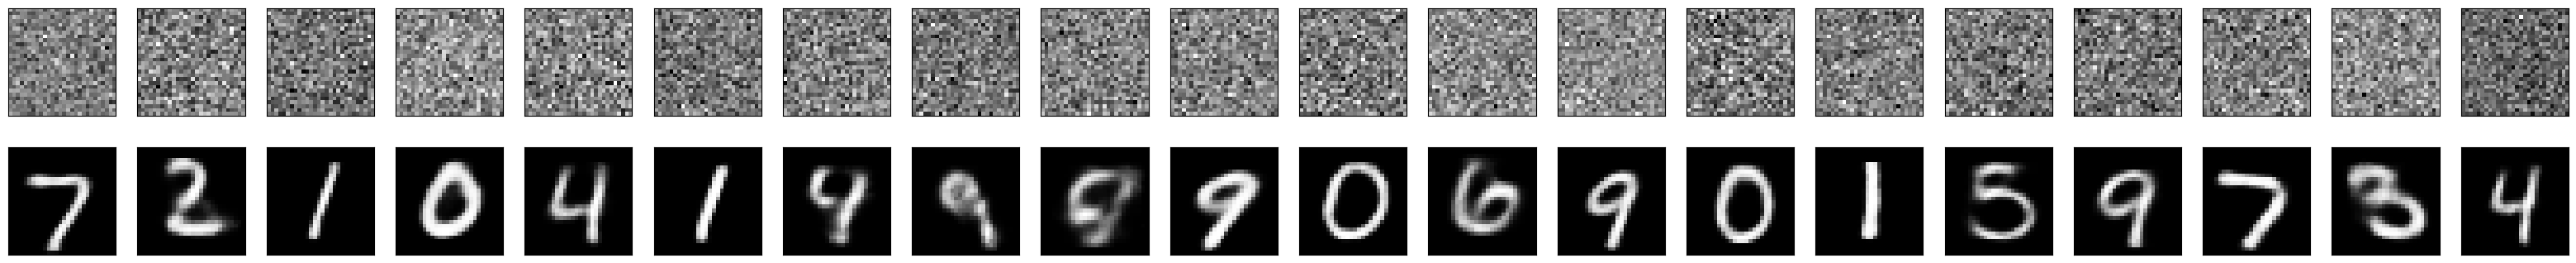

In [40]:
# Noise .10
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noise10[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 0s 880us/step


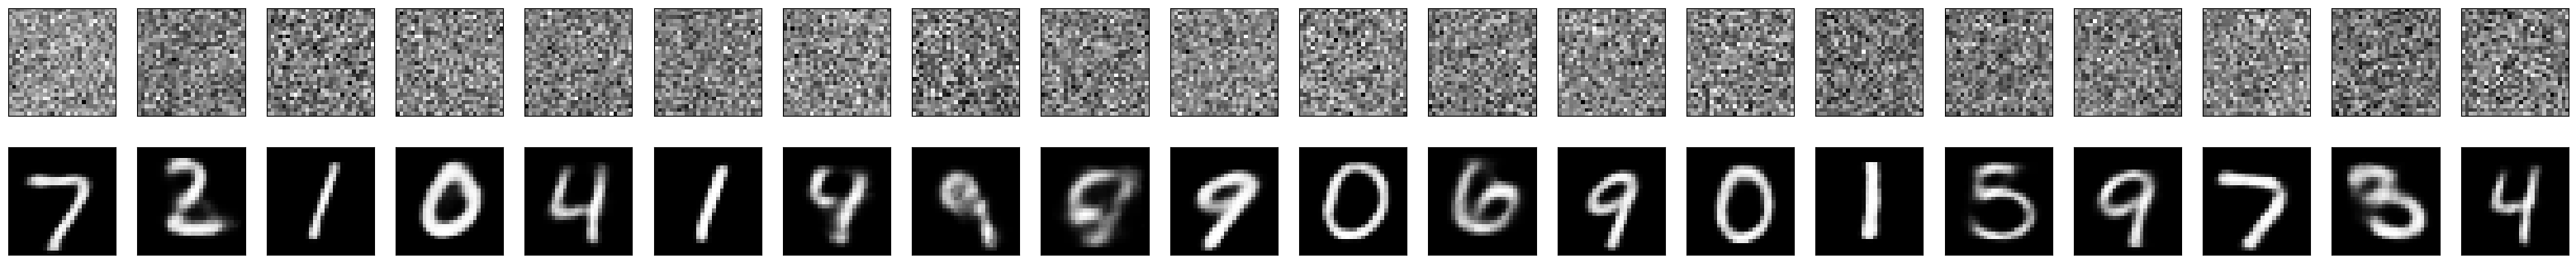

In [41]:
# Noise .50
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noise50[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 0s 826us/step


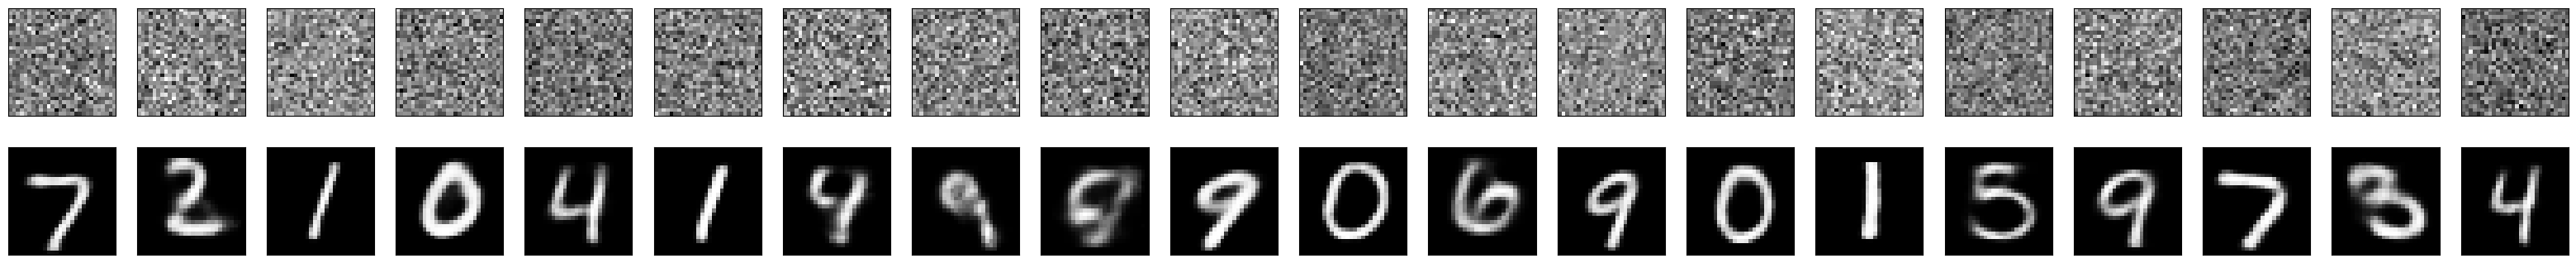

In [42]:
# Noise 1
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noise1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 0s 780us/step


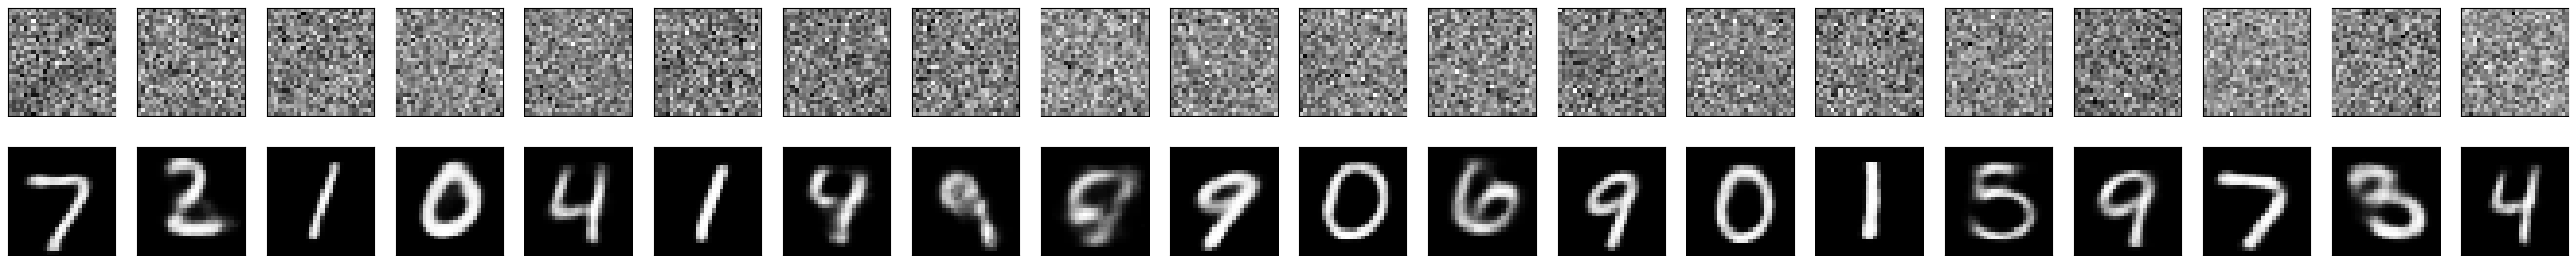

In [43]:
# Noise 2
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noise2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

313/313 [==============================] - 0s 918us/step


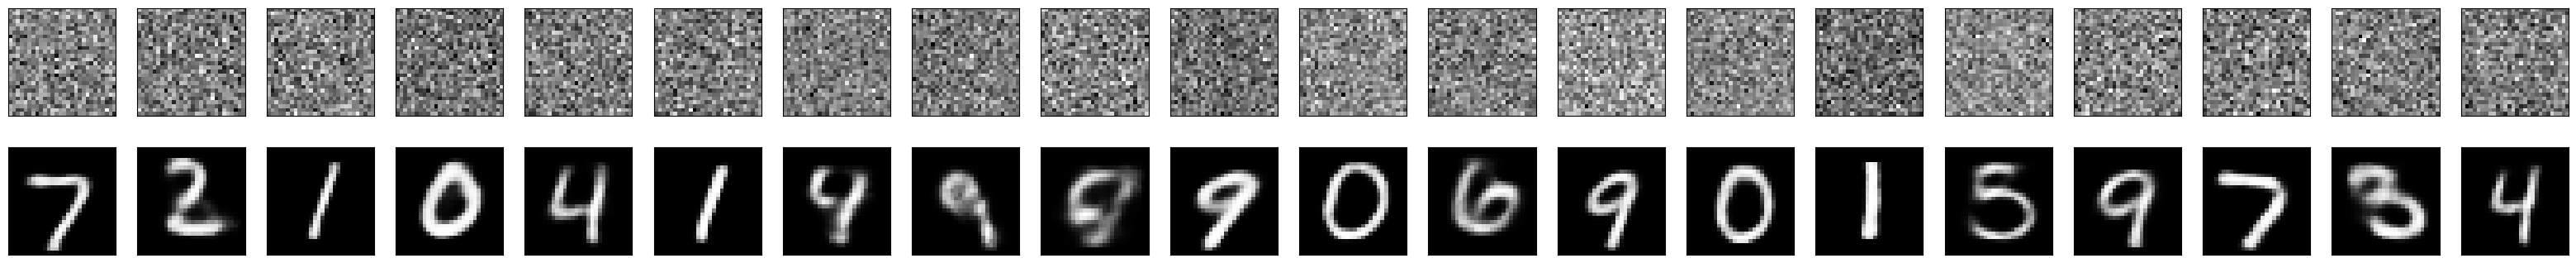

In [44]:
# Noise 4
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noise4[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()